# Week 1 Group Projects

This notebook is a template workspace for the week 1 group projects involving
the [Reproducible Brain Charts](https://reprobrainchart.github.io/) (RBC)
database. Herein, we demonstrate how to access the RBC data and demonstrate a
linear regression analysis on the dataset.

## Getting Started with RBC Data

To load in some of the RBC data, we'll use some tools already installed on the
HUB: `rbclib` and `pandas`.
The `rbclib` library allows us to access RBC data from the cloud; it is
demonstrated below.

The `pandas` library handles spreadsheet data (called `DataFrame`s in Python)
and can read tab-separated and comma-separated value files (`*.tsv` and
`*.csv` files).

In [1]:
from rbclib import RBCPath
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Accessing the PNC Dataset

The RBC project contains many datasets; for this project, we will focus on
just one of these datasets: the
[Philadelphia Neurodevelopmental Cohort](
https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html)
(PNC). The PNC contains a lot of data, including raw MRI data. However, due to
the time constraints for this project, we suggest that teams focus on the
already processed data provided by the RBC, which is described below.

The RBC's data is stored in a combination of GitHub repositories and Amazon S3
buckets. The RBC GitHub repositories all belong to the organization
[`ReproBrainChart`](https://github.com/ReproBrainChart), and each contains a
subset of the data for one of the RBC datasets; for the PNC dataset, all
repositories names start with `PNC_`:

* `PNC_FreeSurfer`: structural data processed by FreeSurfer.
* `PNC_BIDS`: raw MRI scan data in the
  [Brain Imaging Data Structure](https://bids.neuroimaging.io/index.html)
  format.
* `PNC_CPAC`: processed functional MRI data.

One typically accesses the RBC using the [`datalad`](https://www.datalad.org/)
tool (see the [RBC page on accessing the data](
https://reprobrainchart.github.io/docs/get_data) for more information).
However, we will access the data using the `RBCPath` type that was imported in
the code-cell above (`from rbclib import RBCPath`). This type inherits from a
type called `CloudPath` (from the library [`cloudpathlib`](
https://cloudpathlib.drivendata.org/stable/)); it represents the path of a
file in the RBC dataset and can be used to access data in thecloud as if it
were local.

For example, the following cell creates an `RBCPath` to a subject's FreeSurfer
data directory then lists and prints the contents.

In [2]:
# This path refers to the repo github.com:ReproBrainChart/PNC_FreeSurfer;
# Subject 1000393599's directory is used as an example.
subject_id = 1000393599
# To browse the repo, use this link:
# https://github.com/ReproBrainChart/PNC_FreeSurfer/tree/main
sub_path = RBCPath(f'rbc://PNC_FreeSurfer/freesurfer/sub-{subject_id}')

# This path refers to a directory:
assert sub_path.is_dir()

# Print each file in the directory:
for file in sub_path.iterdir():
    print(repr(file))

RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.json')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_freesurfer.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsLR_den-164k.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_fsaverage.tar.xz')
RBCPath('rbc://PNC_FreeSurfer//home/jovyan/shared/data/RBC/PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv')


If we want to open and load one of these files, we can do so using the
`RBCPath.open` method. This method is like the `Path.open` method (from the
built-in Python library [`pathlib`](1)). For example, if we want to load this
subject's `regionsurfacestats.tsv` file, we can do so as follows.

[1]: https://docs.python.org/3/library/pathlib.html

In [3]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_regionsurfacestats.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_regionsurfacestats.tsv ...


,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


In [4]:
# We can construct new paths by using the `/` operator. This is identical to
# how paths are constructed in the `pathlib` module.
stats_filepath = sub_path / f'sub-{subject_id}_brainmeasures.tsv'

# Use pandas to read in the TSV file then display it:

print(f"Loading {stats_filepath} ...")
with stats_filepath.open('r') as f:
    data = pd.read_csv(f, sep='\t')

data

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv ...


,subject_id,session_id,lh_euler,rh_euler,lh_holes,rh_holes,Cortex_NumVert_lh,Cortex_PialSurfArea_lh,Cortex_MeanThickness_lh,BrainSeg_BrainSegVol_lh,...,SubCortGray_SubCortGrayVol,TotalGray_TotalGrayVol,SupraTentorial_SupraTentorialVol,SupraTentorialNotVent_SupraTentorialVolNotVent,SupraTentorialNotVentVox_SupraTentorialVolNotVentVox,Mask_MaskVol,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol_eTIV
0,sub-1000393599,NaN,-192.0,-152.0,97.0,77.0,135628.0,108937.0,2.63309,1230074.0,...,62861.0,711344.285602,1.081472e+06,1.070299e+06,1066970.0,1524907.0,97.0,77.0,174.0,1.606206e+06


In [9]:
# RBCPath pointing to the FreeSurfer directory
root_path = RBCPath("rbc://PNC_FreeSurfer/freesurfer/")

# Only check for names starting with 'sub-' (skip .is_dir() check to avoid FileNotFoundError)
subject_ids = [p.name for p in root_path.iterdir() if p.name.startswith("sub-")]

#NEW: progress bar
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(subject_ids), description="Loading:")
display(prog)

# Load each subject's brainmeasures.tsv file
all_dfs = []

for i,subject_id in enumerate(subject_ids):
    brainmeasures_path = root_path / subject_id / f"{subject_id}_brainmeasures.tsv"

    if brainmeasures_path.exists():
        try:
            print(f"Loading {brainmeasures_path} ...")
            with brainmeasures_path.open("r") as f:
                df = pd.read_csv(f, sep="\t")
                df["subject_id"] = subject_id
                all_dfs.append(df)
        except Exception as e:
            print(f"Error reading {brainmeasures_path}: {e}")
    else:
        print(f"File not found: {brainmeasures_path}")
    prog.value = i + 1

IntProgress(value=0, description='Loading:', max=1592)

Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000393599/sub-1000393599_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1000881804/sub-1000881804_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1001970838/sub-1001970838_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-100527940/sub-100527940_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1006151876/sub-1006151876_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1007995238/sub-1007995238_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1011497669/sub-1011497669_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1012530688/sub-1012530688_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1017092387/sub-1017092387_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1020132225/sub-1020132225_brainmeasures.tsv ...
Loading rbc://PNC_FreeSurfer/freesurfer/sub-1023701836/sub-1023701836_brainmeasure

In [17]:
# Combine into one big DataFrame
all_brain_df = pd.concat(all_dfs, ignore_index=True)

# Select only numeric features
numeric_df = all_brain_df.select_dtypes(include="number")

# --- Step 1: Filter for useful features ---

# Keep  _Volume_mm3, _CortexVol_*
kept_cols = [col for col in numeric_df.columns if (
    col.endswith("_Volume_mm3") or "_CortexVol_" in col)]

# Remove "_normMean", "_normStdDev", "_normRange", "_NVoxels"
excluded_substrings = ["_normMean", "_normStdDev", "_normRange", "_NVoxels"]
filtered_cols = [
    col for col in kept_cols
    if not any(excl in col for excl in excluded_substrings)
]

filtered_df = numeric_df[filtered_cols]

# --- Step 2: Aggregate across hemispheres (Left/Right → Mean) ---

# Find paired left/right regions
aggregated_df = pd.DataFrame()
aggregated_df["subject_id"] = all_brain_df["subject_id"]

# Group left/right pairs
region_names = set()
for col in filtered_cols:
    if col.startswith("Left_"):
        base = col.replace("Left_", "")
        right_col = "Right_" + base
        if right_col in filtered_df.columns:
            region_names.add(base)

# For each region, compute mean of Left_ and Right_
for base in region_names:
    left = f"Left_{base}"
    right = f"Right_{base}"
    mean_name = f"Mean_{base}"
    aggregated_df[mean_name] = filtered_df[[left, right]].mean(axis=1)

# include unpaired features (e.g., Brain_Stem)
unpaired_cols = [
    col for col in filtered_cols
    if not col.startswith("Left_") and not col.startswith("Right_")
]
aggregated_df = pd.concat([aggregated_df, filtered_df[unpaired_cols]], axis=1)

# --- Summary ---
print(f"Original features: {numeric_df.shape[1]}")
print(f"Filtered features: {aggregated_df.shape[1] - 1}")  # subtract 1 for subject_id

print("\nFinal Feature Names:")
print(aggregated_df.columns.tolist())

Original features: 360
Filtered features: 31

Final Feature Names:
['subject_id', 'Mean_Accumbens_area_Volume_mm3', 'Mean_Putamen_Volume_mm3', 'Mean_vessel_Volume_mm3', 'Mean_Cerebellum_White_Matter_Volume_mm3', 'Mean_WM_hypointensities_Volume_mm3', 'Mean_choroid_plexus_Volume_mm3', 'Mean_VentralDC_Volume_mm3', 'Mean_Thalamus_Proper_Volume_mm3', 'Mean_Cerebellum_Cortex_Volume_mm3', 'Mean_Lateral_Ventricle_Volume_mm3', 'Mean_Pallidum_Volume_mm3', 'Mean_Caudate_Volume_mm3', 'Mean_Hippocampus_Volume_mm3', 'Mean_Amygdala_Volume_mm3', 'Mean_non_WM_hypointensities_Volume_mm3', 'Mean_Inf_Lat_Vent_Volume_mm3', 'Cortex_CortexVol_lh', 'Cortex_CortexVol_rh', 'Third_Ventricle_Volume_mm3', 'Fourth_Ventricle_Volume_mm3', 'Brain_Stem_Volume_mm3', 'CSF_Volume_mm3', 'Fifth_Ventricle_Volume_mm3', 'WM_hypointensities_Volume_mm3', 'non_WM_hypointensities_Volume_mm3', 'Optic_Chiasm_Volume_mm3', 'CC_Posterior_Volume_mm3', 'CC_Mid_Posterior_Volume_mm3', 'CC_Central_Volume_mm3', 'CC_Mid_Anterior_Volume_mm3', 

In [46]:
# Summary stats
summary_stats = aggregated_df.describe().T
display(summary_stats)

summary_stats.to_csv("/home/jovyan/w1proj-group/results/summary_stats.csv")

,count,mean,std,min,25%,50%,75%,max
Mean_Accumbens_area_Volume_mm3,1592.0,464.574843,78.612586,250.000000,410.800000,461.775000,513.950000,925.550000
Mean_Putamen_Volume_mm3,1592.0,5094.633763,549.725631,3389.250000,4710.587500,5076.525000,5464.825000,7336.000000
Mean_vessel_Volume_mm3,1592.0,19.894033,12.560316,0.000000,11.800000,18.350000,25.262500,111.100000
Mean_Cerebellum_White_Matter_Volume_mm3,1592.0,14197.511558,3018.138524,6477.350000,12400.112500,13601.175000,15161.912500,34529.500000
Mean_WM_hypointensities_Volume_mm3,1592.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean_choroid_plexus_Volume_mm3,1592.0,342.604491,111.762885,115.200000,265.337500,326.625000,407.912500,862.100000
Mean_VentralDC_Volume_mm3,1592.0,3921.395634,423.136012,2740.950000,3630.812500,3898.850000,4181.175000,5620.100000
Mean_Thalamus_Proper_Volume_mm3,1592.0,7974.103361,843.696481,5443.900000,7393.400000,7917.150000,8510.512500,10833.150000
Mean_Cerebellum_Cortex_Volume_mm3,1592.0,54887.386118,5934.629089,27276.700000,51115.750000,55035.650000,58827.387500,73693.200000
Mean_Lateral_Ventricle_Volume_mm3,1592.0,5506.676759,2988.335618,1230.500000,3574.287500,4739.575000,6536.550000,29043.000000


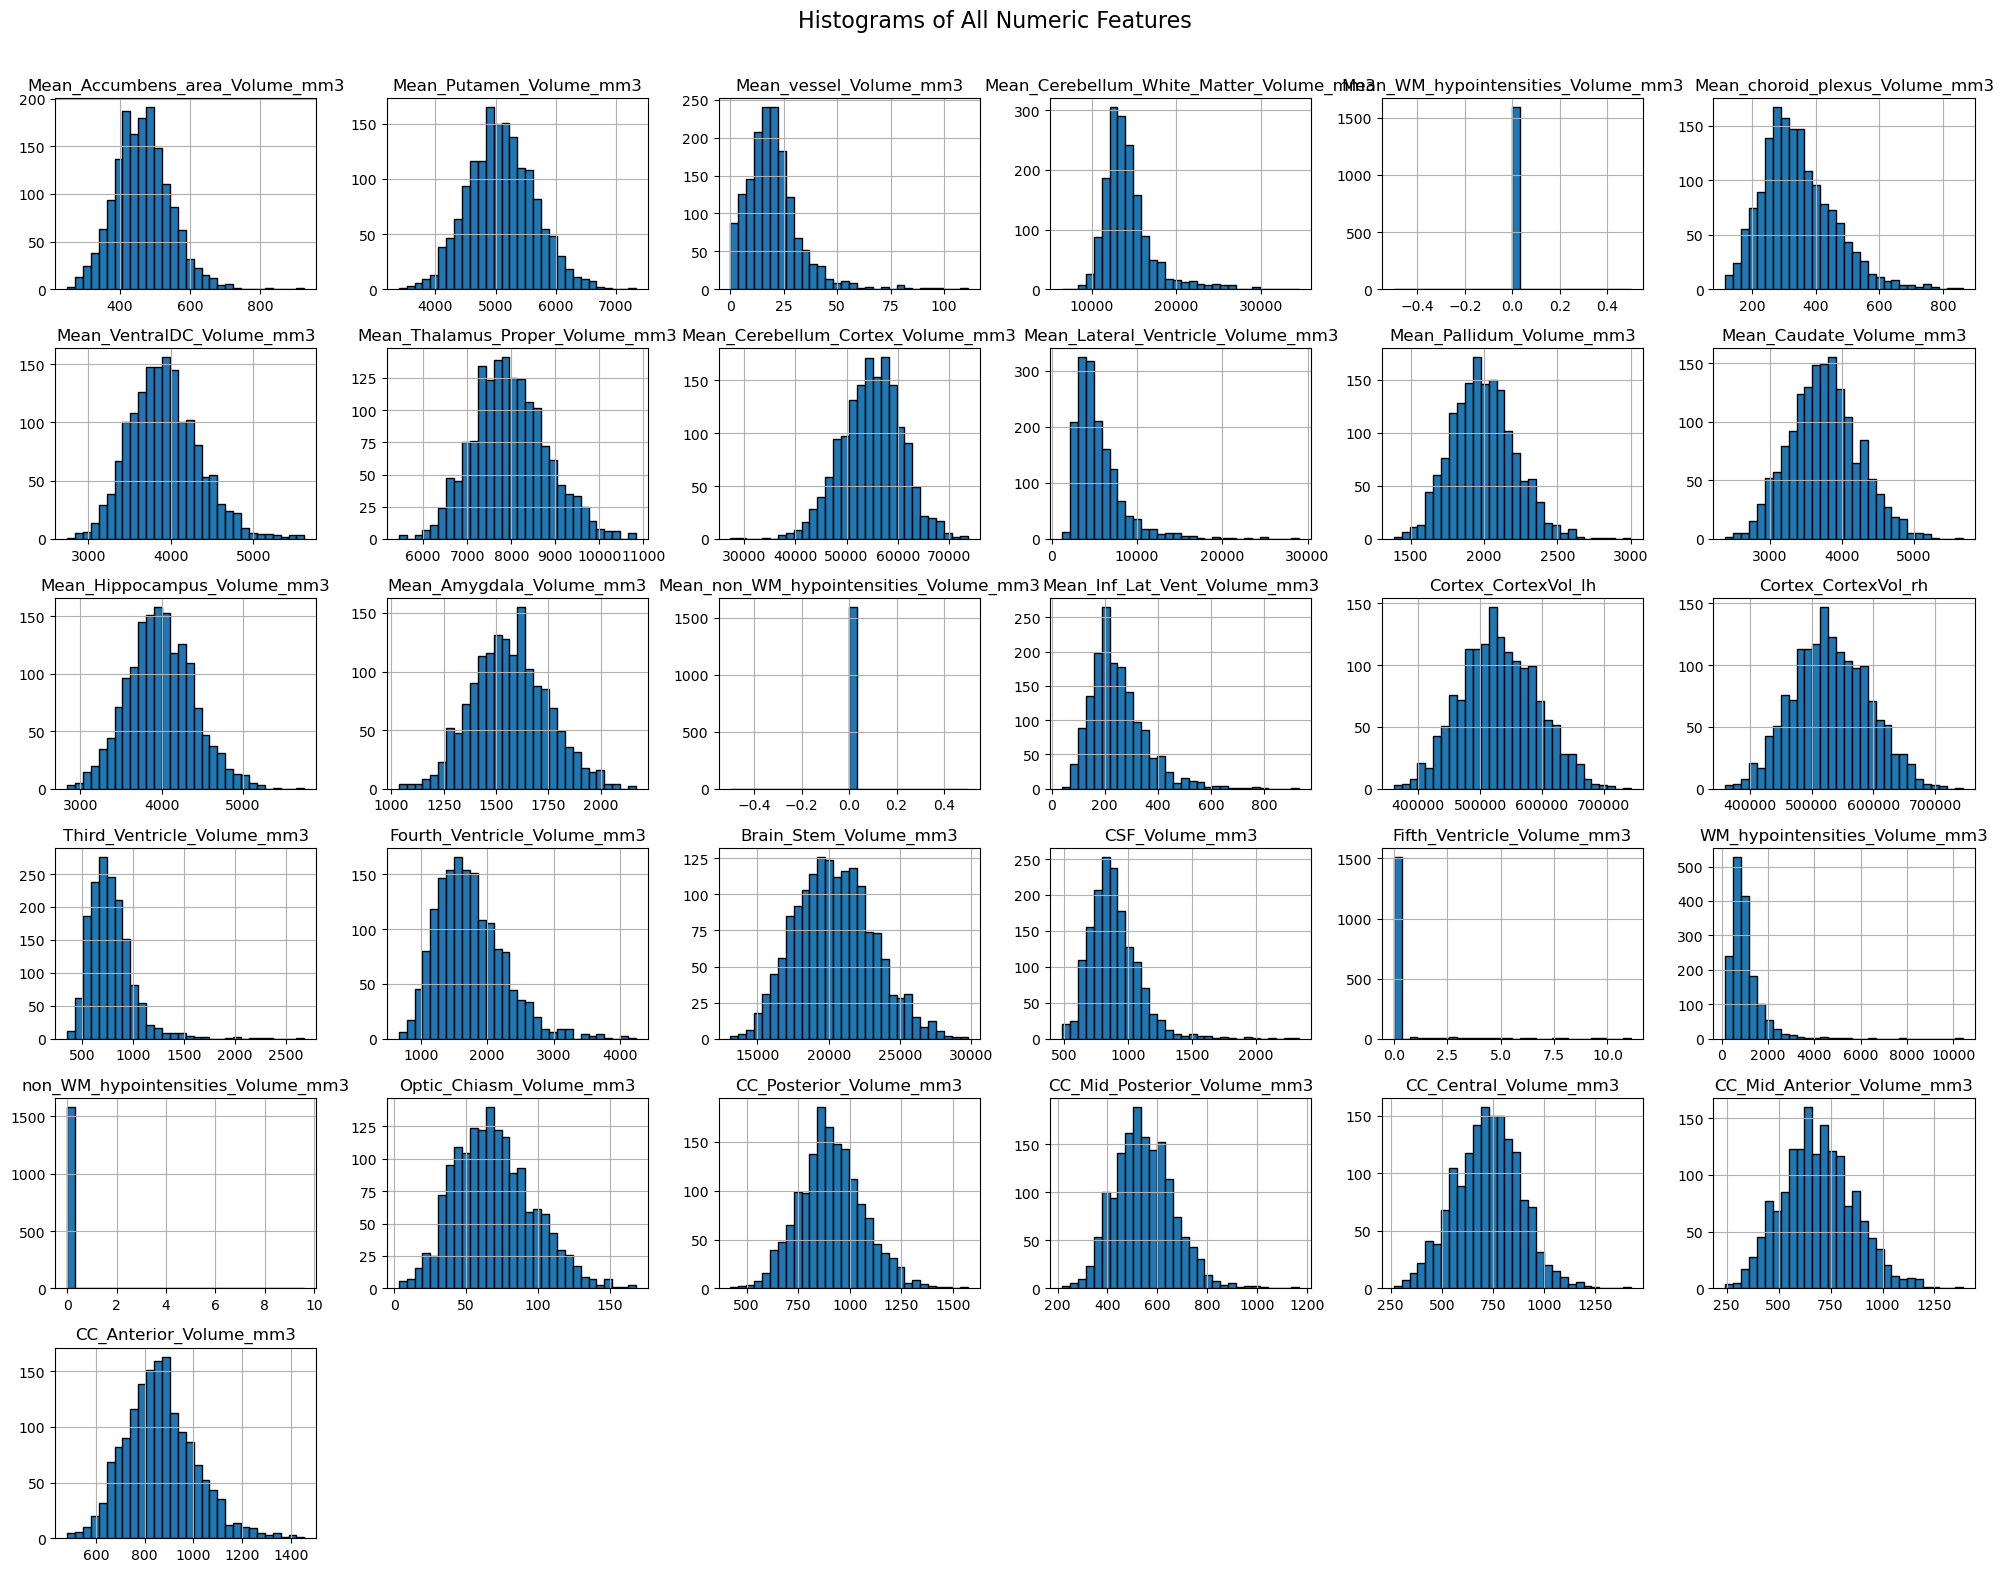

In [43]:
# Distributions
aggregated_df.hist(figsize=(20, 16), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [41]:
# correlations
# Drop non-numeric identifiers
features_only = aggregated_df.select_dtypes(include="number")

# Compute correlation matrix
corr_matrix = features_only.corr()

# Unstack and filter for strong correlations
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1.0]  # exclude self-correlations
high_corr_pairs = high_corr[high_corr > 0.65]  # adjust threshold as needed

print("Pairs with correlation > 0.65:")
display(high_corr_pairs)

Pairs with correlation > 0.65:


CC_Mid_Anterior_Volume_mm3         CC_Central_Volume_mm3                0.754998
CC_Central_Volume_mm3              CC_Mid_Anterior_Volume_mm3           0.754998
Mean_Pallidum_Volume_mm3           Mean_Putamen_Volume_mm3              0.700712
Mean_Putamen_Volume_mm3            Mean_Pallidum_Volume_mm3             0.700712
Mean_Thalamus_Proper_Volume_mm3    Mean_VentralDC_Volume_mm3            0.691758
Mean_VentralDC_Volume_mm3          Mean_Thalamus_Proper_Volume_mm3      0.691758
Cortex_CortexVol_lh                Mean_Thalamus_Proper_Volume_mm3      0.689453
Cortex_CortexVol_rh                Mean_Thalamus_Proper_Volume_mm3      0.689453
Mean_Thalamus_Proper_Volume_mm3    Cortex_CortexVol_rh                  0.689453
                                   Cortex_CortexVol_lh                  0.689453
CC_Posterior_Volume_mm3            CC_Mid_Posterior_Volume_mm3          0.672535
CC_Mid_Posterior_Volume_mm3        CC_Posterior_Volume_mm3              0.672535
Mean_Lateral_Ventricle_Volum

### Getting the Participant Lists and Metadata

We have pre-sorted the participants in the PNC study into a training and a
test dataset. Basic metadata about each participant can be found in TSV files
in the `shared` directory in your home directory.

In [4]:
# Participant meta-data is generally located in the BIDS repository for each
# study:
rbcdata_path = Path('/home/jovyan/shared/data/RBC')
train_filepath = rbcdata_path / 'train_participants.tsv'
test_filepath = rbcdata_path / 'test_participants.tsv'

# Load the PNC participants TSV files...
with train_filepath.open('r') as f:
    train_data = pd.read_csv(f, sep='\t')
with test_filepath.open('r') as f:
    test_data = pd.read_csv(f, sep='\t')

# We can also concatenate the two datasets into a single dataset of all
# study participants:
all_data = pd.concat([train_data, test_data])

# Display the full dataframe:
all_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000393599,PNC,PNC1,PNC1,1,15.583333,Male,Black,not Hispanic or Latino,22.15,Right,9th Grade,Complete primary,Complete secondary,0.589907,-0.449373,-0.630780,-1.842178,1
1,1001970838,PNC,PNC1,PNC1,1,17.833333,Male,Other,Hispanic or Latino,23.98,Right,11th Grade,Complete tertiary,Complete tertiary,-0.659061,0.531072,0.392751,0.190706,1
2,1007995238,PNC,PNC1,PNC1,1,13.750000,Female,Other,not Hispanic or Latino,23.77,Right,6th Grade,Complete tertiary,Complete primary,-1.608375,-0.744118,-0.314187,-0.432662,1
3,1011497669,PNC,PNC1,PNC1,1,16.666667,Male,White,not Hispanic or Latino,29.68,Right,9th Grade,Complete tertiary,Complete tertiary,-1.233807,-0.896835,-0.449099,0.111167,1
4,1017092387,PNC,PNC1,PNC1,1,18.666667,Female,Black,not Hispanic or Latino,23.24,Right,11th Grade,Complete primary,Complete primary,-0.923100,-0.313455,2.204168,-0.782266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,NaN,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,NaN,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,NaN,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,NaN,0.360029,-0.515655,1.509584,114


In [17]:
print(f"train N: {len(train_data)}")
print(f"test N: {len(test_data)}")

train N: 1067
test N: 534


## Project Goal: Predict the `p_factor`

The RBC datasets include a variable for each subject called the `p_factor`.
This factor is intended to capture overall psychopathology and is discussed at
length in RBC publications. The goal for this project is to train a
machine-learning tool to predict the `p_factor` of each participant in the
test dataset by using data from the participants in the training dataset.
Note that the `p_factor` column in the training dataset is provided, but the
`p_factor` column in the test dataset has been set to `NaN`.

Your specific task is to calculate predicted `p_factor` values, to insert
these values into the `'p_factor'` column of the provided `test_data`
dataframe, to save `test_data` to disk using the `test_data.to_csv` method
(example below), then finally to commit and push the file to your group's
GitHub repository.

We will look over the results of the group mini-projects together once
everyone has submitted their predictions.

**In this section, we demonstrate an example approach to predicting the
`p_factor` using one of the most straightforward supervised techniques in
machine learning: linear regression.** Suppose we suspected that the size of
Brodmann Area 1 was predictive of the `p_factor` in individual participants
and thus wanted to run a linear regression analysis to predict `p_factor` in
the test participants based on the relationship in the training participants.
Performing linear regression will require a few steps, which are likely to be
similar in your projects:

1. Collect the relevant data (the surface areas of BA1) into a dataframe.
2. Train the linear regression model using the training participants.
3. Use the trained model to predict the `p_factor` of the test subjects.
4. Export and commit our predictions.

### Step 1. Collect Data

The data we need to make the predictions are, for each participant, (1) the
surface area of BA1, and (2) the `p_factor`. We can collect these into a
dataframe using `pandas` and the `RBCPath` type (to load the data).

The surface area of BA1 can be found in the FreeSurfer TSV files examined
earlier in this notebook. We'll start by writing a function that loads the
appropriate TSV for for a given participant.

In order to speed up the loading of data during the project, we can specify
a `local_cache_dir` where any data downloaded using the function will be
automatically saved; the next time you load the same data, it will be loaded
from local storage instead of from S3 (local storage is much faster). The
function here uses the directory `cache` in your home directory by default,
but you can change this if you prefer a different directory. The directory
will be automatically created for you if it does not exist.

In [5]:
def load_fsdata(participant_id, local_cache_dir=(Path.home() / 'cache')):
    "Loads and returns the dataframe of a PNC participant's FreeSurfer data."

    # Check that the local_cache_dir exists and make it if it doesn't.
    if local_cache_dir is not None:
        local_cache_dir = Path(local_cache_dir)
        local_cache_dir.mkdir(exist_ok=True)
    
    # Make the RBCPath and find the appropriate file:
    pnc_freesurfer_path = RBCPath(
        'rbc://PNC_FreeSurfer/freesurfer',
        # We provide the local_cache_dir to the RBCPath object; all paths made
        # from this object will use the same cache directory.
        local_cache_dir=local_cache_dir)
    participant_path = pnc_freesurfer_path / f'sub-{participant_id}'
    tsv_path = participant_path / f'sub-{participant_id}_regionsurfacestats.tsv'

    # Use pandas to read in the TSV file:
    with tsv_path.open('r') as f:
        data = pd.read_csv(f, sep='\t')

    # Return the loaded data:
    return data

We can run this function to obtain a subject's FreeSurfer dataframe. This
dataframe contains information about various anatomical atlases that segment
the cortical surface into distinct regions. Notice that the `atlas` column of
the dataframe contains the name of distinct atlases while the `StructName`
column contains the name of the ROI described. The `SurfArea` column gives the
surface area of each ROI.

In [6]:
example_participant_id = 1000393599
data = load_fsdata(example_participant_id)

# Display the dataframe we loaded:
data

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
0,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalanteriorcingulate,1668,1121,3493,2.870,0.588,...,5.8371,-1.8413,42.8855,44.7269,4.4281,1.9877,0.0777,1.8054,2.1455,0.3402
1,sub-1000393599,NaN,aparc.DKTatlas,lh,caudalmiddlefrontal,3308,2236,7030,2.882,0.537,...,4.6666,7.1531,40.4774,33.3243,5.0341,3.3898,0.2448,2.7003,3.8032,1.1029
2,sub-1000393599,NaN,aparc.DKTatlas,lh,cuneus,4102,2619,5753,2.019,0.490,...,5.2623,-13.1617,33.8137,46.9754,3.0343,3.2453,0.3093,2.4099,3.5491,1.1392
3,sub-1000393599,NaN,aparc.DKTatlas,lh,entorhinal,737,549,2714,3.655,0.585,...,6.0438,2.5989,37.5099,34.9110,3.4560,2.6710,0.1285,2.4654,2.9647,0.4993
4,sub-1000393599,NaN,aparc.DKTatlas,lh,fusiform,4115,2822,8180,2.738,0.526,...,5.2854,-5.9378,39.6908,45.6286,3.9405,2.8272,0.1093,2.3304,3.1105,0.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_3,14937,9936,27688,2.611,0.492,...,5.0774,-10.8846,39.2314,50.1161,4.1769,3.1173,0.3747,2.4544,4.7044,2.2500
13736,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_4,13382,9146,29555,2.909,0.582,...,5.8317,-41.1954,52.2013,93.3967,3.8157,3.5262,0.9928,1.8828,5.1531,3.2703
13737,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_5,10558,7677,31072,3.196,0.792,...,7.1063,-22.2837,88.8118,111.0955,3.3020,2.5300,0.3971,2.0215,4.7753,2.7538
13738,sub-1000393599,NaN,Yeo2011_7Networks_N1000,rh,7Networks_6,20144,13602,41999,2.696,0.641,...,6.0781,-11.6287,43.5814,55.2101,3.6592,3.0563,0.5547,1.8599,4.9149,3.0550


To extract the surface area of BA1, we need to look for rows whose
`StructName` indicates that it represents BA1. In the RBC database, the name
`'Brodmann.1'` is used to represent Brodmann Area 1. We can select only the
rows of interest using this name.

In [7]:
row_mask = (data['StructName'] == 'Brodmann.1')
data[row_mask]

,subject_id,session_id,atlas,hemisphere,StructName,NumVert,SurfArea,GrayVol,ThickAvg,ThickStd,...,StdDev_wgpct,Min_wgpct,Max_wgpct,Range_wgpct,SNR_wgpct,Mean_piallgi,StdDev_piallgi,Min_piallgi,Max_piallgi,Range_piallgi
1876,sub-1000393599,NaN,PALS_B12_Brodmann,lh,Brodmann.1,2851,1753,4067,2.069,0.576,...,5.2783,-7.2181,32.3884,39.6064,3.0996,3.4915,0.6993,2.4164,5.3746,2.9581
1919,sub-1000393599,NaN,PALS_B12_Brodmann,rh,Brodmann.1,2379,1537,3766,2.008,0.586,...,4.8646,-6.7201,38.8376,45.5577,3.3062,3.2389,0.5011,2.4060,4.8009,2.3949


Given these rows, we can extract the BA1 surface areas and sum them (we will
perform the linear regression on the bilateral BA1 surface area by adding the
left and right hemisphere surface areas).

In [8]:
ba1_surfareas = data.loc[row_mask, 'SurfArea']
ba1_surfarea = sum(ba1_surfareas)

# Show the bilateral surface area for this participant (in square mm):
ba1_surfarea

3290

Based on the above workflow, we can now write a function that extracts the BA1
surface area for a participant.

In [9]:
def load_ba1_surfarea(participant_id):
    """Loads and returns the bilateral Brodmann Area 1 surface area for a PNC
    study participant.
    """
    # First, load the subject's FreeSurfer dataframe:
    data = load_fsdata(participant_id)
    # Next, find the relevant rows:
    row_mask = (data['StructName'] == 'Brodmann.1')
    # Then extract and sum the surface areas:
    ba1_surfareas = data.loc[row_mask, 'SurfArea']
    ba1_surfarea = sum(ba1_surfareas)
    # And return this value:
    return ba1_surfarea

Let's test this function:

In [10]:
load_ba1_surfarea(example_participant_id)

3290

Now that we have code written to extract data from a single subject, we can
gather the BA1 data for our training and test subjects into a single
dataframe. Doing so will require downloading all of the TSV files for all of
the subjects in the training dataset. This will take some time, but probably
less than an hour.

In [11]:
# First load in surface area data for each participant:
print("Loading surface areas...")     

# We will put the rows in this dictionary of lists as we build the dataframe:
all_vars = {
    'participant_id': [],
    'ba1_surface_area': [],
    'p_factor': []}

# We'll display a progress bar `prog` as we go also:
from ipywidgets import IntProgress
prog = IntProgress(min=0, max=len(all_data))
display(prog)

# Okay, loop through each row of the `all_data` dataframe, which contains both
# training and test subjects, load their BA1 data, and store it in the
# all_vars dictionary.
for (ii, row) in all_data.iterrows():
    # Extract the participant ID and p_factor (which will be NaN for test
    # participants).
    participant_id = row['participant_id']
    p_factor = row['p_factor']
    # Load the surface area for this participant:
    try:
        surf_area = load_ba1_surfarea(participant_id)
    except FileNotFoundError:
        # Some subjects are just missing the file, so we code them as NaN.
        surf_area = np.nan
    # Append the participant ID and their surface area to our dataset:
    all_vars['participant_id'].append(participant_id)
    all_vars['ba1_surface_area'].append(surf_area)
    all_vars['p_factor'].append(p_factor)
    # Increment the progress bar counter:
    prog.value += 1

# Convert train_vars into a dataframe.
all_vars = pd.DataFrame(all_vars)

# Extract the training and test subjects into separate dataframes; the test
# participants can be identified as those having NaN values for their
# p_factor column.
train_vars = all_vars[~np.isnan(all_vars['p_factor'])]
test_vars = all_vars[np.isnan(all_vars['p_factor'])]

# Display the finished dataframe.
all_vars

Loading surface areas...


IntProgress(value=0, max=1601)

,participant_id,ba1_surface_area,p_factor
0,1000393599,3290.0,0.589907
1,1001970838,2629.0,-0.659061
2,1007995238,2921.0,-1.608375
3,1011497669,3184.0,-1.233807
4,1017092387,2973.0,-0.923100
...,...,...,...
1596,969649154,3086.0,NaN
1597,970890500,2235.0,NaN
1598,975856179,2863.0,NaN
1599,984757368,2877.0,NaN


### Step 2. Train the Linear Regression

To train and perform the linear regression analysis, we will use the
[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
type from scikit-learn.

In [12]:
# Import the LinearRegression type:
from sklearn.linear_model import LinearRegression

# LinearRegression requires a matrix whose columns are the variables and whose
# final column is the value being predicted (the p_factor for us). We can
# extract these columns straight from the dataframes we generated.
train_matrix = train_vars.loc[:, ['ba1_surface_area', 'p_factor']].values
# We need to exclude rows with NaNs for training:
train_okrows = np.all(~np.isnan(train_matrix), axis=1)
train_matrix = train_matrix[train_okrows]

# Train the regression using the training matrix:
lreg = LinearRegression()
lreg.fit(train_matrix[:, :1], train_matrix[:, 1])

# Display the trained regression parameters:
print("Linear Regression:")
print("  Intercept:", lreg.intercept_)
print("  Slope:", lreg.coef_)

Linear Regression:
  Intercept: 0.42976633990916446
  Slope: [-0.0003118]


### Step 3. Predict the `p_factor` of the Test Data

In [13]:
# We can apply the trained linear regression object `lreg` to the 1-column
# matrix of ba1_surface_area values in the test_vars dataframe.
test_matrix = test_vars.loc[:, ['ba1_surface_area']].values
test_okrows = np.all(~np.isnan(test_matrix), axis=1)
test_matrix = test_matrix[test_okrows]

# Apply the model:
p_factor_predictions = lreg.predict(test_matrix)

# Display the predictions:
p_factor_predictions

array([-0.42986345, -0.41645609, -0.30982084, -0.66620708, -0.2929837 ,
       -0.3849644 , -0.37685762, -0.39587736, -0.49066425, -0.47039732,
       -0.48380467, -0.48162208, -0.54522907, -0.52122055, -0.42830445,
       -0.29672528, -0.52090875, -0.5673668 , -0.45948435, -0.4454534 ,
       -0.48505187, -0.37872842, -0.24122507, -0.43797022, -0.44015282,
       -0.38091101, -0.55614204, -0.34380693, -0.40523133, -0.46634393,
       -0.40897292, -0.31917481, -0.39431837, -0.60540628, -0.3846526 ,
       -0.52963912, -0.48286928, -0.5364987 , -0.40304874, -0.55770103,
       -0.65591771, -0.37405143, -0.44950679, -0.37623402, -0.29828428,
       -0.26367459, -0.48318108, -0.36407386, -0.51747896, -0.49752383,
       -0.42861625, -0.48567547, -0.45013038, -0.46852652, -0.50313621,
       -0.32011021, -0.4142735 , -0.44202361, -0.35690249, -0.55551844,
       -0.56892579, -0.62130802, -0.59480511, -0.5053188 , -0.38153461,
       -0.49347044, -0.60914786, -0.46416134, -0.32042201, -0.51

### Step 4. Save and Commit the Results

To save and commit the results, we first need to save the predicted `p_factor`
data into the test dataframe (where there are currently NaNs). In the cell
above, we calculated the variable `test_okrows` that indicates which rows
of the `test_vars`, `test_matrix`, and `test_data` objects were predicted
(those that weren't predicted were excluded due to missing surface area data
in our case).

We can use this to insert the predicted `p_factor` data into `test_data`.

In [14]:
test_data.loc[test_okrows, 'p_factor'] = p_factor_predictions

# Display the resulting test data:
test_data

,participant_id,study,study_site,session_id,wave,age,sex,race,ethnicity,bmi,handedness,participant_education,parent_1_education,parent_2_education,p_factor,internalizing_mcelroy_harmonized_all_samples,externalizing_mcelroy_harmonized_all_samples,attention_mcelroy_harmonized_all_samples,cubids_acquisition_group
0,1000881804,PNC,PNC1,PNC1,1,14.916667,Male,Black,not Hispanic or Latino,21.52,Right,7th Grade,Complete secondary,Complete secondary,-0.429863,0.097355,0.387355,-0.467807,113
1,100527940,PNC,PNC1,PNC1,1,8.250000,Male,Black,not Hispanic or Latino,NaN,Ambidextrous,1st Grade,Complete secondary,Complete primary,-0.416456,0.699062,-0.781881,-0.982040,3
2,1006151876,PNC,PNC1,PNC1,1,21.500000,Female,Other,not Hispanic or Latino,NaN,Right,12th Grade,Complete tertiary,Complete secondary,-0.309821,0.495947,0.806481,-0.832210,1
3,1012530688,PNC,PNC1,PNC1,1,8.750000,Male,Black,not Hispanic or Latino,21.36,Right,2nd Grade,Complete tertiary,Complete secondary,-0.666207,-0.334835,1.277773,0.161110,4
4,1030193285,PNC,PNC1,PNC1,1,18.000000,Male,White,not Hispanic or Latino,22.15,Right,10th Grade,Complete secondary,Complete primary,-0.292984,1.027404,-0.490472,2.014568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,969649154,PNC,PNC1,PNC1,1,12.333333,Male,White,not Hispanic or Latino,17.38,Right,5th Grade,Complete tertiary,Complete secondary,-0.532445,-0.148520,0.556444,0.024228,1
530,970890500,PNC,PNC1,PNC1,1,18.166667,Female,White,not Hispanic or Latino,30.89,Right,11th Grade,Complete secondary,Complete secondary,-0.267104,0.993806,1.578177,-0.373470,1
531,975856179,PNC,PNC1,PNC1,1,11.000000,Male,White,not Hispanic or Latino,15.67,Right,4th Grade,Complete primary,Complete secondary,-0.462914,-1.026645,-0.582212,1.333857,1
532,984757368,PNC,PNC1,PNC1,1,13.416667,Male,Black,not Hispanic or Latino,16.66,Right,5th Grade,Complete primary,NaN,-0.467279,0.360029,-0.515655,1.509584,114


We now need to save the data to disk. We want to put this in the `results`
directory of the repository.

In [20]:
# The sep='\t' option here is necessary for tab-separated-value (as opposed to
# comma-separated-value) files. The `index=False` just indicates that pandas
# doesn't need to write out its own index column.

group_name = 'example'  # Change this to be your group name!

test_data.to_csv(f'results/{group_name}.tsv', sep='\t', index=False)

Once the tsv file has been saved, you can commit it to your GitHub repository
then push it and submit a pull request to the `results` branch of the original
repository!